In [ ]:
#a
import pandas as pd

df = pd.read_csv('exam-scores.csv')
df.head()

,f1,f2,f3,f4,f5,f6,target
0,M01,A,20,N,N,Y,+
1,M01,A,20,?,?,?,+
2,M01,A,30,Y,Y,Y,+
3,M01,A,50,N,Y,Y,+
4,M01,A,55,Y,Y,N,+


In [ ]:
#b
# Replace missing values with mode
df = df.fillna(df.mode().iloc[0])

# Encode categorical variables
df = pd.get_dummies(df, columns=['f1', 'f2', 'f4', 'f5', 'f6'])


In [ ]:
df.head()

,f3,target,f1_M01,f1_M02,f2_A,f2_B,f2_C,f2_D,f4_?,f4_N,f4_Y,f5_?,f5_N,f5_Y,f6_?,f6_N,f6_Y
0,20,+,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1
1,20,+,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0
2,30,+,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1
3,50,+,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1
4,55,+,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0


In [ ]:
#c
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
#d
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()


In [ ]:
#e
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, pos_label='+'))
print('Recall:', recall_score(y_test, y_pred, pos_label='+'))
print('F1 score:', f1_score(y_test, y_pred, pos_label='+'))


Accuracy: 0.75
Precision: 0.8823529411764706
Recall: 0.8333333333333334
F1 score: 0.8571428571428571


[Text(0.5, 0.9375, 'x[12] <= 0.5\ngini = 0.231\nsamples = 45\nvalue = [39, 6]'),
 Text(0.4444444444444444, 0.8125, 'x[0] <= 30.0\ngini = 0.355\nsamples = 26\nvalue = [20, 6]'),
 Text(0.16666666666666666, 0.6875, 'x[0] <= 17.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.1111111111111111, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2222222222222222, 0.5625, 'x[8] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.1111111111111111, 0.4375, 'x[2] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.05555555555555555, 0.3125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.16666666666666666, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.4375, 'x[2] <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.2777777777777778, 0.3125, 'x[3] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2222222222222222, 0.1875, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3333333333333333, 0.1875, 'gini = 0.0

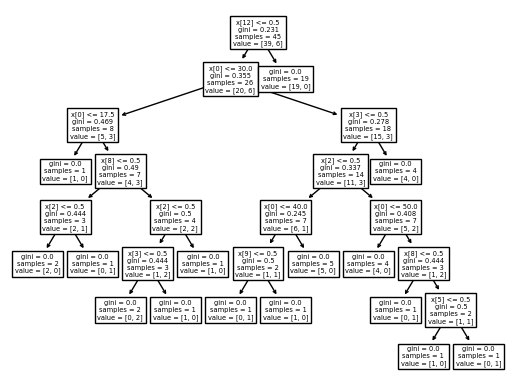

In [ ]:
#f
from sklearn.tree import plot_tree

plot_tree(clf)


In [ ]:
#g
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [2, 4, 6, 8],
              'min_samples_split': [2, 4, 6, 8]}

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)


Best parameters: {'max_depth': 2, 'min_samples_split': 2}
Best score: 0.8222222222222222


In [ ]:
#h
best_clf = DecisionTreeClassifier(max_depth=6, min_samples_split=2)

best_clf.fit(X_train, y_train)

y_pred = best_clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, pos_label='+'))
print('Recall:', recall_score(y_test, y_pred, pos_label='+'))
print('F1 score:', f1_score(y_test, y_pred, pos_label='+'))


Accuracy: 0.75
Precision: 0.8823529411764706
Recall: 0.8333333333333334
F1 score: 0.8571428571428571


In [ ]:
#i
'''
To evaluate the performance of the best decision tree on the test data, we can use the same evaluation metrics as before. Yes, the decision tree can determine the pass or fail status based on the given features.
'''